# Dependencias

In [40]:
import matplotlib.pyplot as plt
import numpy as np

pontos = [{"id": 0, "x": 0, "y": 0},
          {"id": 1, "x": -1.198, "y": -5.164},
          {"id": 2, "x": 5.573, "y": 7.114},
          {"id": 3, "x": -6.614, "y": 0.072},
          {"id": 4, "x": -7.374, "y": -1.107},
          {"id": 5, "x": -9.251, "y": 8.321},
          {"id": 6, "x": 6.498, "y": -6.036},
          {"id": 7, "x": 0.861, "y": 6.903},
          {"id": 8, "x": 3.904, "y": -5.261},
          {"id": 9, "x": 7.976, "y": -9.000},
          {"id": 10, "x": -2.61, "y": 0.039},
          {"id": 11, "x": 4.487, "y": 7.142},
          {"id": 12, "x": 8.938, "y": -4.388},
          {"id": 13, "x": -4.17, "y": -9.09},
          {"id": 14, "x": 7.835, "y": -9.269},
          {"id": 15, "x": 2.792, "y": -7.944},
          {"id": 16, "x": 5.212, "y": 9.271},
          {"id": 17, "x": 6.687, "y": 6.731},
          {"id": 18, "x": -2.19, "y": -9.21},
          {"id": 19, "x": -1.06, "y": 8.752},
          {"id": 20, "x": 6.883, "y": 0.882},
          {"id": 21, "x": -3.142, "y": 4.221},
          {"id": 22, "x": 0.556, "y": -3.124},
          {"id": 23, "x": -8.237, "y": 5.899},
          {"id": 24, "x": -4.236, "y": 2.167},
          {"id": 25, "x": 1.275, "y": 0.721},
          {"id": 26, "x": -6.168, "y": -6.287},
          {"id": 27, "x": 3.765, "y": -3.889},
          {"id": 28, "x": 9.176, "y": 6.874},
          {"id": 29, "x": -7.738, "y": 8.064},
          {"id": 30, "x": 8.163, "y": -0.652},
          {"id": 31, "x": -4.429, "y": -5.762},
          {"id": 32, "x": -0.327, "y": -1.943},
          {"id": 33, "x": 1.432, "y": 3.549},
          {"id": 34, "x": -4.291, "y": 6.345},
          {"id": 35, "x": -8.512, "y": 3.979},
          {"id": 36, "x": -2.120, "y": 9.307},
          {"id": 37, "x": 0.495, "y": -7.270},
          {"id": 38, "x": 9.273, "y": 3.270},
          {"id": 39, "x": -7.202, "y": 9.799},
          {"id": 40, "x": -6.643, "y": -7.123},
          {"id": 41, "x": 5.841, "y": 5.853},
          {"id": 42, "x": -8.634, "y": -0.147},
          {"id": 43, "x": 1.515, "y": -6.024},
          {"id": 44, "x": -4.887, "y": -5.350}]

# Gerando Rotas com Intersecções

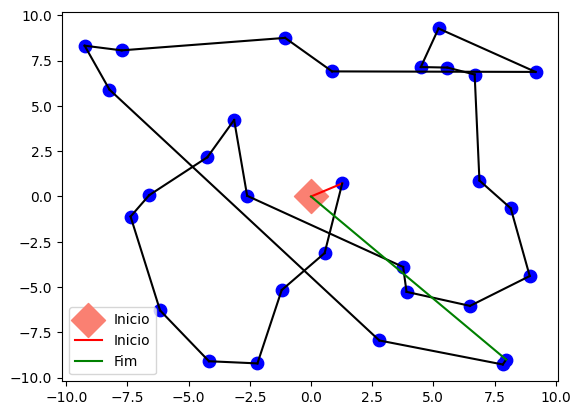

In [28]:
def generate_route(points):
    # Ponto central
    central_point = {"id": 0, "x": 0, "y": 0}

    # Adiciona o ponto central como o ponto atual
    current_point = central_point

    # Cria uma lista para armazenar a rota
    route = [current_point]

    # Remove o ponto central da lista de pontos
    points.remove(central_point)

    # Enquanto ainda houver pontos na lista de entrada, continua adicionando o ponto mais próximo à rota
    while len(points) > 0:
        # Calcula as distâncias entre o ponto atual e todos os pontos restantes
        distances = [np.linalg.norm([current_point['x'] - p['x'], current_point['y'] - p['y']]) for p in points]

        # Encontra o índice do ponto mais próximo e o adiciona à rota
        nearest_idx = np.argmin(distances)
        nearest_point = points.pop(nearest_idx)
        route.append(nearest_point)

        # Define o ponto mais próximo como o novo ponto atual
        current_point = nearest_point

    # Adiciona o ponto central novamente para completar o ciclo
    route.append(central_point)

    return route


def plot_route(route):
    # Separa as coordenadas x e y de todos os pontos na rota
    x = [p['x'] for p in route]
    y = [p['y'] for p in route]

    # Plota os pontos usando a função scatter, com tamanho 100 e cor azul
    plt.scatter(x, y, s=80, color='blue')

    # Plota as linhas que conectam os pontos, com cor verde
    labels = ['Inicio']
    for i in range(len(route) - 1):
        p1 = route[i]
        p2 = route[i + 1]
        if i == 0:
            # Ponto inicial é vermelho
            plt.scatter(p1['x'], p1['y'], s=300, color='salmon', marker='D', label='Inicio')
            color = 'red'
        elif i == len(route) - 2:
            color = 'green'  # Última linha é verde
            labels.append('Fim')
        else:
            color = 'black'  # Linhas intermediárias são pretas
            labels.append('')
        plt.plot([p1['x'], p2['x']], [p1['y'], p2['y']], color=color, label=labels[i])

    # Mostra o gráfico
    plt.legend()
    plt.show()


rota = generate_route(pontos)
plot_route(rota)

# Gerando Rotas sem Intersecções

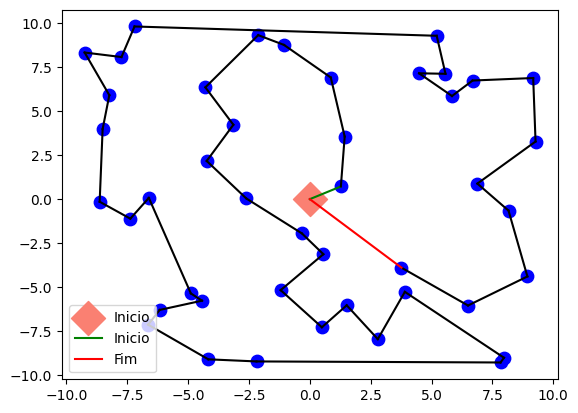

In [41]:
def has_intersection(route):
    """
    Verifica se há interseções entre os segmentos de linha que conectam os pontos da rota.

    Args:
        route (list): Lista de pontos que representam uma rota.

    Returns:
        bool: True se houver interseção, False caso contrário.
    """
    n = len(route)
    for i in range(n - 2):
        for j in range(i + 2, n - 1):
            p1, q1 = route[i], route[i + 1]
            p2, q2 = route[j], route[j + 1]
            if do_segments_intersect(p1, q1, p2, q2):
                return True
    return False


def do_segments_intersect(p1, q1, p2, q2):
    """
    Verifica se dois segmentos de linha se intersectam.

    Args:
        p1 (dict): Dicionário com as coordenadas x e y do primeiro ponto do primeiro segmento de linha.
        q1 (dict): Dicionário com as coordenadas x e y do segundo ponto do primeiro segmento de linha.
        p2 (dict): Dicionário com as coordenadas x e y do primeiro ponto do segundo segmento de linha.
        q2 (dict): Dicionário com as coordenadas x e y do segundo ponto do segundo segmento de linha.

    Returns:
        bool: True se os segmentos de linha se intersectam, False caso contrário.
    """
    def ccw(a, b, c):
        return (c['y'] - a['y']) * (b['x'] - a['x']) > (b['y'] - a['y']) * (c['x'] - a['x'])

    return ccw(p1, p2, q2) != ccw(q1, p2, q2) and ccw(p1, q1, p2) != ccw(p1, q1, q2)


def remove_intersection(route):
    """
    Remove interseções entre os segmentos de linha que conectam os pontos da rota.

    Args:
        route (list): Lista de pontos que representam uma rota.

    Returns:
        list: lista de pontos com as interseções removidas.
    """
    n = len(route)
    for i in range(n - 2):
        for j in range(i + 2, n - 1):
            p1, q1 = route[i], route[i + 1]
            p2, q2 = route[j], route[j + 1]
            if do_segments_intersect(p1, q1, p2, q2):
                new_route = route[:i + 1] + route[j:i:-1] + route[j + 1:]
                return new_route
    return route


def generate_route(points):
    # Ponto central
    central_point = {"id": 0, "x": 0, "y": 0}

    # Adiciona o ponto central como o ponto atual
    current_point = central_point

    # Cria uma lista para armazenar a rota
    route = [current_point]

    # Remove o ponto central da lista de pontos
    points.remove(central_point)

    # Enquanto ainda houver pontos na lista de entrada, continua adicionando o ponto mais próximo à rota
    while len(points) > 0:
        # Calcula as distâncias entre o ponto atual e todos os pontos restantes
        distances = [np.linalg.norm([current_point['x'] - p['x'], current_point['y'] - p['y']]) for p in points]

        # Encontra o índice do ponto mais próximo e o adiciona à rota
        nearest_idx = np.argmin(distances)
        nearest_point = points.pop(nearest_idx)
        route.append(nearest_point)

        # Define o ponto mais próximo como o novo ponto atual
        current_point = nearest_point

    # Adiciona o ponto central novamente para completar o ciclo
    route.append(central_point)

    return route


def plot_route(route):
    # Separa as coordenadas x e y de todos os pontos na rota
    x = [p['x'] for p in route]
    y = [p['y'] for p in route]

    # Plota os pontos usando a função scatter, com tamanho 100 e cor azul
    plt.scatter(x, y, s=80, color='blue')

    # Plota as linhas que conectam os pontos, com cor verde
    labels = ['Inicio']
    for i in range(len(route) - 1):
        p1 = route[i]
        p2 = route[i + 1]
        if i == 0:
            # Ponto inicial é vermelho
            plt.scatter(p1['x'], p1['y'], s=300, color='salmon', marker='D', label='Inicio')
            color = 'green'
        elif i == len(route) - 2:
            color = 'red'  # Última linha é verde
            labels.append('Fim')
        else:
            color = 'black'  # Linhas intermediárias são pretas
            labels.append('')
        plt.plot([p1['x'], p2['x']], [p1['y'], p2['y']], color=color, label=labels[i])

    # Mostra o gráfico
    plt.legend()
    plt.show()


rota = generate_route(pontos)
while has_intersection(rota):
    rota = remove_intersection(rota)
plot_route(rota)